# Task: 
Create a model that accurately predicts the resale price of HDB Flat Singapore.

# Data Source: 
### [Singapore HDB Flat Resale Prices (1990-2020)](https://www.kaggle.com/teyang/singapore-hdb-flat-resale-prices-19902020?select=resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv)



# Data Context:
Every day in the small country of Singapore, people are struggling to purchase houses due to a number of factors, but primarily because of Singapore's limited land. Prices are competitive and new houses and flats are very expensive. Thus, many people have turned to purchasing resale Housing Development Board (HDB) flats. Researching into the pricing and drivers of these HDB resale prices is therefore important, not just for individuals or families wanting to purchase a new house, but also for analysts and economists trying to understand the stability and performance of this sector.

# Data Content: 
The dataset contains 4 CSV files, which covers transactions from 1990 - 2020. It includes features of the flat and sale, such as the year of sale, location of the flat, flat type, street name, block number, area of the flat, lease and resale price.

The approximate floor area includes any recess area purchased, space adding item under HDB’s upgrading programmes, roof terrace, etc.

The transactions exclude resale transactions that may not reflect the full market price such as resale between relatives and resale of part shares.

Resale prices should be taken as indicative only as the resale prices agreed between buyers and sellers are dependent on many factors.

Remaining lease is the number of years, months and days left before the lease expires. This information is computed as at the resale flat application and has been rounded up to the nearest month for the purpose of CPF monies usage and HDB loan application.

Prior to March 2012, data is based on date of approval for the resale transactions. For March 2012 onwards, the data is based on date of registration for the resale transactions.

# 1.0 Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import plotly.express as px

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# 2.0 Load Data

This project will only focus on data from 2017 to 2020.

In [3]:
df = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [4]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
df.shape

(80374, 11)

# 3.0 Data Cleaning 

## Identify missing values

In [6]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

There is no missing value in our dataframe. 

## Convert all float columns to integer

In [7]:
# Identify float columns
float_col = df.select_dtypes(include=['float64'])
list(float_col.columns.values)

['floor_area_sqm', 'resale_price']

In [8]:
# Change float to int 
df['floor_area_sqm'] = df['floor_area_sqm'].astype('int64')
df['resale_price'] = df['resale_price'].astype('int64')
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000
...,...,...,...,...,...,...,...,...,...,...,...
80369,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131,Improved,1987,66 years 03 months,440000
80370,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122,Improved,1987,65 years 06 months,458000
80371,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122,Improved,1987,66 years 04 months,490000
80372,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146,Maisonette,1987,66 years 03 months,558000


## Clean flat types column 

In [9]:
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI GENERATION'], dtype=object)

In [10]:
df['flat_type'].value_counts()

4 ROOM              33282
5 ROOM              19947
3 ROOM              19420
EXECUTIVE            6411
2 ROOM               1240
1 ROOM                 37
MULTI GENERATION       37
Name: flat_type, dtype: int64

## Rename flat model column duplicates

In [11]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room'],
      dtype=object)

In [12]:
df['flat_model'].value_counts()

Model A                   26288
Improved                  20067
New Generation            11061
Premium Apartment          8689
Simplified                 3368
Apartment                  3257
Maisonette                 2376
Standard                   2260
DBSS                       1332
Model A2                   1045
Adjoined flat               152
Model A-Maisonette          136
Type S1                     134
Type S2                      74
Terrace                      46
Multi Generation             37
Premium Apartment Loft       26
Improved-Maisonette          14
Premium Maisonette           10
2-room                        2
Name: flat_model, dtype: int64

In [13]:
replace_values = {'Multi Generation':'3Gen', 'Model A-Maisonette': 'Maisonette', 'Improved-Maisonette': 'Executive Maisonette', 'Premium Maisonette': 'Executive Maisonette', 'Premium Apartment Loft': 'Premium Apartment'}

df = df.replace({'flat_model': replace_values})

df['flat_model'].value_counts()

Model A                 26288
Improved                20067
New Generation          11061
Premium Apartment        8715
Simplified               3368
Apartment                3257
Maisonette               2512
Standard                 2260
DBSS                     1332
Model A2                 1045
Adjoined flat             152
Type S1                   134
Type S2                    74
Terrace                    46
3Gen                       37
Executive Maisonette       24
2-room                      2
Name: flat_model, dtype: int64

In [14]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

## Reduce number of class of town to regions

In [15]:
replace_values = {'ANG MO KIO':'North East', 'BEDOK':'East', 'BISHAN':'Central', 'BUKIT BATOK':'West', 'BUKIT MERAH':'Central',
       'BUKIT PANJANG':'West', 'BUKIT TIMAH':'Central', 'CENTRAL AREA':'Central', 'CHOA CHU KANG':'West',
       'CLEMENTI':'West', 'GEYLANG':'Central', 'HOUGANG':'North East', 'JURONG EAST':'West', 'JURONG WEST':'West',
       'KALLANG/WHAMPOA':'Central', 'MARINE PARADE':'Central', 'PASIR RIS':'East', 'PUNGGOL':'North East',
       'QUEENSTOWN':'Central', 'SEMBAWANG':'North', 'SENGKANG':'North East', 'SERANGOON':'North East', 'TAMPINES':'East',
       'TOA PAYOH':'Central', 'WOODLANDS':'North', 'YISHUN':'North'}

df = df.replace({'town': replace_values})

df['town'].value_counts()

North East    20589
West          19045
Central       14964
North         13764
East          12012
Name: town, dtype: int64

In [16]:
df['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

## Extract Year from both month and remaining lease column

In [17]:
df['Year'] = df['month'].astype(str).str[:4]
df['remaining_lease_year'] = df['remaining_lease'].astype(str).str[:2]
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Year,remaining_lease_year
0,2017-01,North East,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000,2017,61
1,2017-01,North East,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000,2017,60
2,2017-01,North East,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000,2017,62
3,2017-01,North East,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000,2017,62
4,2017-01,North East,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000,2017,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80369,2020-09,North,5 ROOM,716,YISHUN ST 71,07 TO 09,131,Improved,1987,66 years 03 months,440000,2020,66
80370,2020-09,North,5 ROOM,760,YISHUN ST 72,07 TO 09,122,Improved,1987,65 years 06 months,458000,2020,65
80371,2020-09,North,5 ROOM,835,YISHUN ST 81,04 TO 06,122,Improved,1987,66 years 04 months,490000,2020,66
80372,2020-09,North,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146,Maisonette,1987,66 years 03 months,558000,2020,66


In [18]:
df['remaining_lease_year'] = df['remaining_lease_year'].astype('int64')
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Year,remaining_lease_year
0,2017-01,North East,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000,2017,61
1,2017-01,North East,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000,2017,60
2,2017-01,North East,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000,2017,62
3,2017-01,North East,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000,2017,62
4,2017-01,North East,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000,2017,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80369,2020-09,North,5 ROOM,716,YISHUN ST 71,07 TO 09,131,Improved,1987,66 years 03 months,440000,2020,66
80370,2020-09,North,5 ROOM,760,YISHUN ST 72,07 TO 09,122,Improved,1987,65 years 06 months,458000,2020,65
80371,2020-09,North,5 ROOM,835,YISHUN ST 81,04 TO 06,122,Improved,1987,66 years 04 months,490000,2020,66
80372,2020-09,North,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146,Maisonette,1987,66 years 03 months,558000,2020,66


# 4.0 Exploratory Data Analysis

We will analzye 7 independent variables (Town, Flat type, Storey Range, Floor area sqm, Flat model, Lease commence date, Remaining lease, Year) and Resale Price as the dependent variable with a subplot. 

Text(0.5, 1.0, 'Resale Price by Year')

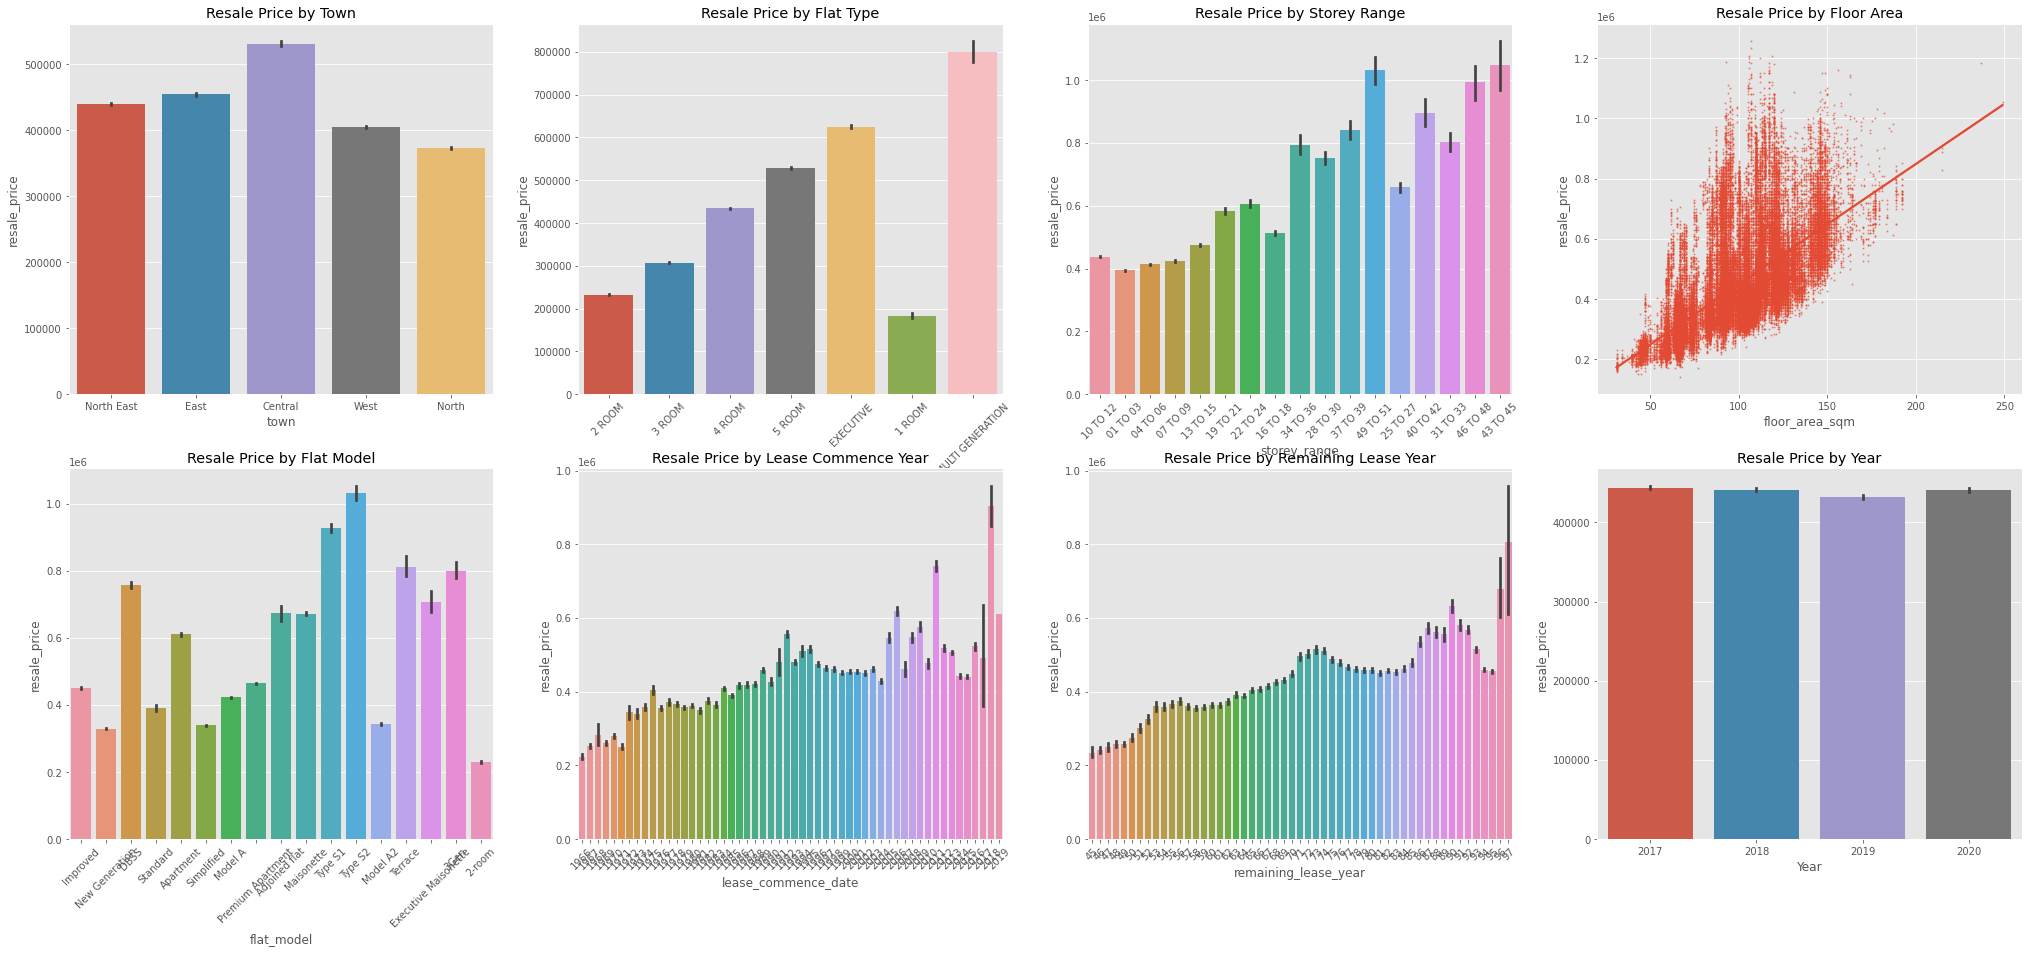

In [19]:
#Subplot
plt.figure(figsize=(35,15))
plt.subplot(2,4,1)
sns.barplot(x=df['town'], y=df['resale_price'])
plt.title("Resale Price by Town")

plt.subplot(2,4,2)
sns.barplot(x=df['flat_type'], y=df['resale_price'])
plt.xticks(rotation=45)
plt.title("Resale Price by Flat Type")

plt.subplot(2,4,3)
sns.barplot(x=df['storey_range'], y=df['resale_price'])
plt.xticks(rotation=45)
plt.title("Resale Price by Storey Range")

plt.subplot(2,4,4)
sns.regplot(x=df['floor_area_sqm'], y=df['resale_price'], scatter_kws={"s": 1, 'alpha':0.5})
plt.title("Resale Price by Floor Area")

plt.subplot(2,4,5)
sns.barplot(x=df['flat_model'], y=df['resale_price'])
plt.xticks(rotation=45)
plt.title("Resale Price by Flat Model")

plt.subplot(2,4,6)
sns.barplot(x=df['lease_commence_date'], y=df['resale_price'])
plt.xticks(rotation=45)
plt.title("Resale Price by Lease Commence Year")

plt.subplot(2,4,7)
sns.barplot(x=df['remaining_lease_year'], y=df['resale_price'])
plt.xticks(rotation=45)
plt.title("Resale Price by Remaining Lease Year")

plt.subplot(2,4,8)
sns.barplot(x=df['Year'], y=df['resale_price'])
plt.title("Resale Price by Year")


## Key Takeaways from the Visualizations Above: 

### 1) Resale Price by Town
       Highest($): Central Town Region  
       Lowest($): North Region 

### 2) Resale Price by Flat Type  
       Highest($): Multi Generation  
       Lowest($): 1 Room

 ### 3) Resale Price by Storey Range 
       Highest($): Level 43 to Level 45 
       Lowest($): Level 01 to Level 03
       The higher the storey, the higher the resale price.

 ### 4) Resale Price by Floor Area 
       The larger the floor area, the higher the resale price. 

 ### 5) Resale Price by Flat Model 
       Highest($): Type S2 
       Lowest($): 2 Room

### 6) Resale Price by Lease Commence Year 
       As the lease commence year increases, the resale price also increases.

### 7) Resale Price by Remaining Lease Year 
       As the remaining lease year increases, the resale price also increases.

### 8) Resale Price by Year 
       We don't see much changes within resale price through the last 4 years. 


# 5.0 Data Preperation

# 5.1 Correlation

### Change Storey range datatype to integer

In [20]:
df['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [21]:
# create a list of conditions
condition = [
    (df['storey_range'] == '01 TO 03' ),
    (df['storey_range'] == '04 TO 06' ),
    (df['storey_range'] == '07 TO 09' ),
    (df['storey_range'] == '10 TO 12' ),
    (df['storey_range'] == '13 TO 15' ), 
    (df['storey_range'] == '16 TO 18' ),
    (df['storey_range'] == '19 TO 21' ), 
    (df['storey_range'] == '22 TO 24' ),
    (df['storey_range'] == '25 TO 27' ),
    (df['storey_range'] == '28 TO 30' ), 
    (df['storey_range'] == '31 TO 33' ),
    (df['storey_range'] == '34 TO 36' ), 
    (df['storey_range'] == '37 TO 39' ),
    (df['storey_range'] == '40 TO 42' ),
    (df['storey_range'] == '43 TO 45' ),
    (df['storey_range'] == '46 TO 48' )
    ]

# create a list of the values we want to assign for each condition
value = ['2', '5', '8', '11', '14','17', '20', '23', '26','29','32','35','38','41','44','47']

# create a new column and use np.select to assign values to it using our lists as arguments
df['storey'] = np.select(condition, value)

# convert to
df['storey'] = df['storey'].astype('int64')

df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Year,remaining_lease_year,storey
0,2017-01,North East,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000,2017,61,11
1,2017-01,North East,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000,2017,60,2
2,2017-01,North East,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000,2017,62,2
3,2017-01,North East,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000,2017,62,5
4,2017-01,North East,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000,2017,62,2


### Convert flat type datatype to integer

In [22]:
# create a list of conditions
con = [
    (df['flat_type'] == '1 ROOM'),
    (df['flat_type'] == '2 ROOM'),
    (df['flat_type'] == '3 ROOM') | (df['flat_type'] == 'EXECUTIVE'),
    (df['flat_type'] == '4 ROOM') | (df['flat_type'] == 'MULTI GENERATION'),
    (df['flat_type'] == '5 ROOM')
    ]

# create a list of the values we want to assign for each condition
val= ['1', '2', '3', '4', '5']

# create a new column and use np.select to assign values to it using our lists as arguments
df['number_of_bedrooms'] = np.select(con, val)

# convert to integer
df['number_of_bedrooms'] = df['number_of_bedrooms'].astype('int64')

df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Year,remaining_lease_year,storey,number_of_bedrooms
0,2017-01,North East,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000,2017,61,11,2
1,2017-01,North East,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000,2017,60,2,3
2,2017-01,North East,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000,2017,62,2,3
3,2017-01,North East,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000,2017,62,5,3
4,2017-01,North East,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000,2017,62,2,3


## Find Correlation

In [23]:
df.corr(method='pearson')

,floor_area_sqm,lease_commence_date,resale_price,remaining_lease_year,storey,number_of_bedrooms
floor_area_sqm,1.000000,0.185875,0.632182,0.189449,0.009578,0.528429
lease_commence_date,0.185875,1.000000,0.328754,0.996013,0.275419,0.302585
resale_price,0.632182,0.328754,1.000000,0.331393,0.365949,0.380664
remaining_lease_year,0.189449,0.996013,0.331393,1.000000,0.276476,0.304730
storey,0.009578,0.275419,0.365949,0.276476,1.000000,0.133480
number_of_bedrooms,0.528429,0.302585,0.380664,0.304730,0.133480,1.000000


## Correlation Matrix

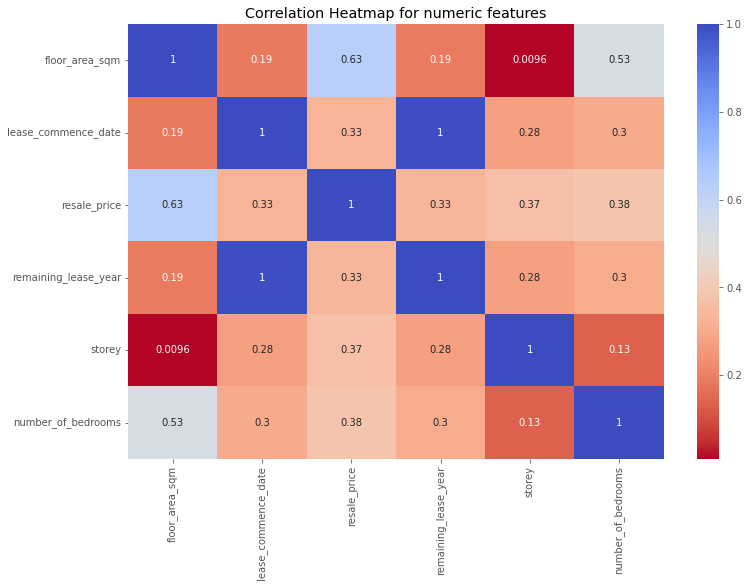

In [24]:
correlation_matrix = df.corr(method='pearson')
heatmap = sns.heatmap(correlation_matrix, annot = True, cmap= 'coolwarm_r')
plt.title('Correlation Heatmap for numeric features')
plt.show()


## Scatterplot Matrix 

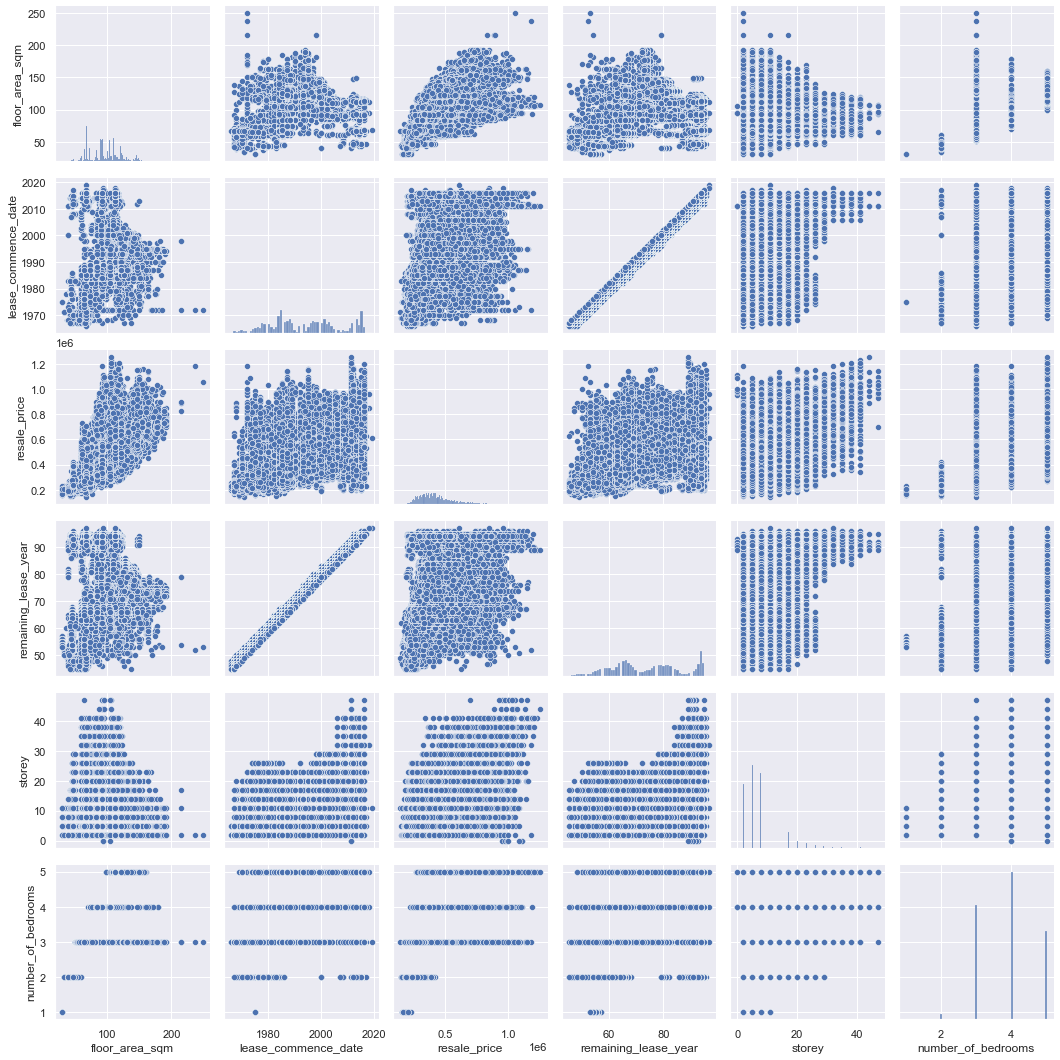

In [25]:
sns.set()
cols = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'remaining_lease_year', 'storey', 'number_of_bedrooms']
sns.pairplot(df[cols], height = 2.5)
plt.show()

In [26]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,Year,remaining_lease_year,storey,number_of_bedrooms
0,2017-01,North East,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44,Improved,1979,61 years 04 months,232000,2017,61,11,2
1,2017-01,North East,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67,New Generation,1978,60 years 07 months,250000,2017,60,2,3
2,2017-01,North East,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,262000,2017,62,2,3
3,2017-01,North East,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68,New Generation,1980,62 years 01 month,265000,2017,62,5,3
4,2017-01,North East,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67,New Generation,1980,62 years 05 months,265000,2017,62,2,3


# 5.2 Normality

In [27]:
# create a new dataframe
data = df.drop(['month','town','flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'remaining_lease','Year'], axis=1)
data

,floor_area_sqm,lease_commence_date,resale_price,remaining_lease_year,storey,number_of_bedrooms
0,44,1979,232000,61,11,2
1,67,1978,250000,60,2,3
2,67,1980,262000,62,2,3
3,68,1980,265000,62,5,3
4,67,1980,265000,62,2,3
...,...,...,...,...,...,...
80369,131,1987,440000,66,8,5
80370,122,1987,458000,65,8,5
80371,122,1987,490000,66,5,5
80372,146,1987,558000,66,5,3


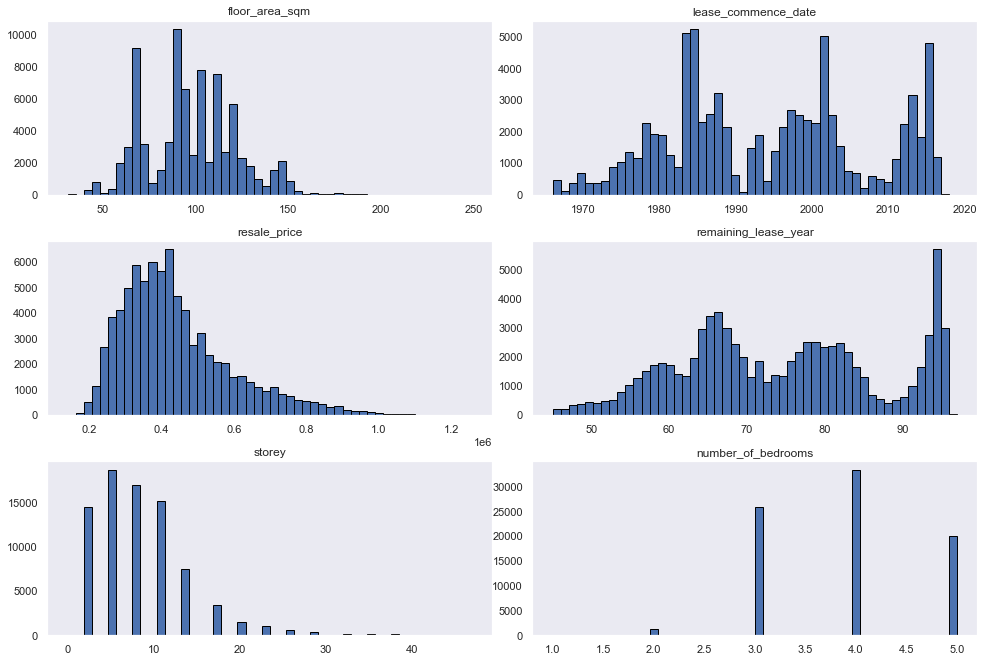

In [28]:
## Plot distribution for each variable
data.hist(bins=50, figsize=(15, 10), grid=False, edgecolor='black')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

We can see that not every variables follow a normal distribution, and some of the variables contains outliers. In this project, we'll just check univariate normality for 'resale_price'. Even though in big samples (>200 observations), normality is not an issue, however, if we solve normality, we may avoid problems like heteroscedacity.


We can see that 'resale_price' is not normal distributed has positive skewness and don't follow the diagonal line. We can solve this by take the log of it.

## Transform the data to make them normally distributed 

C:\Users\zaryn\AppData\Local\Programs\Python\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


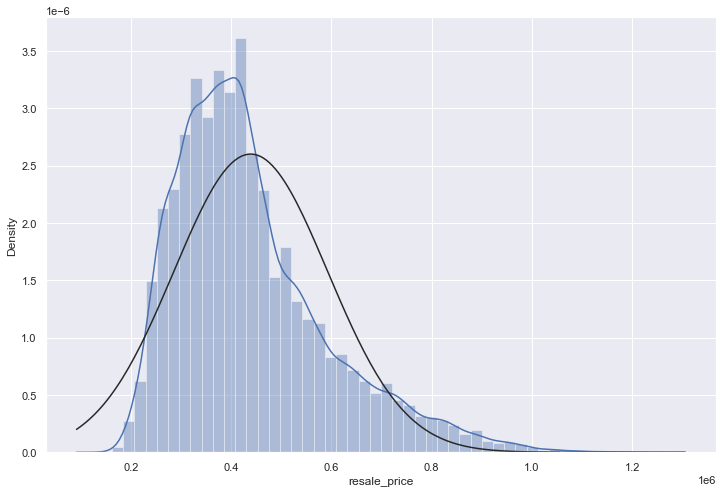

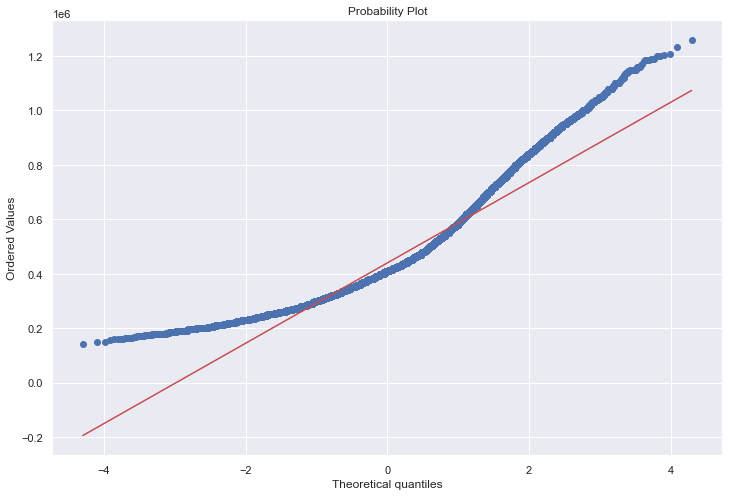

In [29]:
from scipy.stats import norm
from scipy import stats

sns.distplot(data['resale_price'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['resale_price'], plot=plt)

C:\Users\zaryn\AppData\Local\Programs\Python\Python39-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


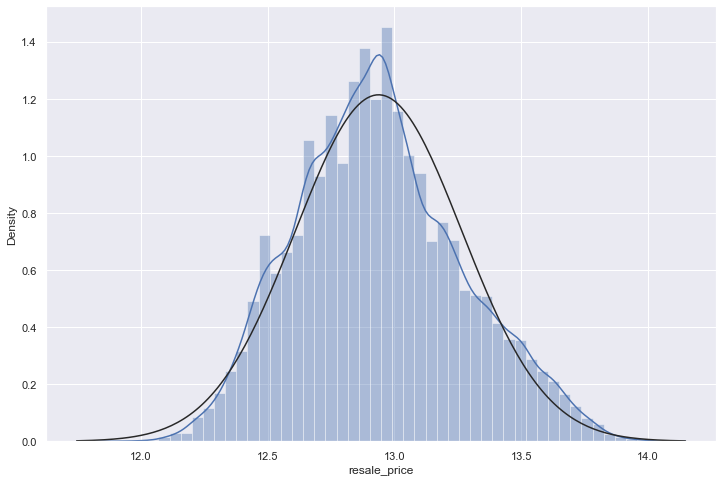

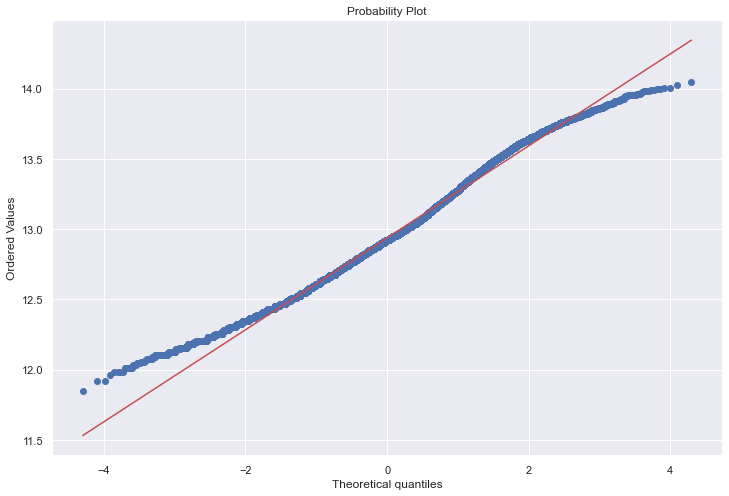

In [30]:
data['resale_price'] = np.log(data['resale_price'])
sns.distplot(data['resale_price'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['resale_price'], plot=plt)

# 5.3 Feature Scaling

In [31]:
data

,floor_area_sqm,lease_commence_date,resale_price,remaining_lease_year,storey,number_of_bedrooms
0,44,1979,12.354493,61,11,2
1,67,1978,12.429216,60,2,3
2,67,1980,12.476100,62,2,3
3,68,1980,12.487485,62,5,3
4,67,1980,12.487485,62,2,3
...,...,...,...,...,...,...
80369,131,1987,12.994530,66,8,5
80370,122,1987,13.034624,65,8,5
80371,122,1987,13.102161,66,5,5
80372,146,1987,13.232114,66,5,3


As our aim is to perform linear regression, so we need to perform feature scaling to normalise the range of independent variables. 

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
# scaled features
scaled_columns = ['floor_area_sqm','lease_commence_date','remaining_lease_year','storey','number_of_bedrooms']
scaler.fit(data[scaled_columns])
scaled_columns = pd.DataFrame(scaler.transform(data[scaled_columns]), index=data.index, columns=scaled_columns)

# separate unscaled features
unscaled_columns = data['resale_price']

# concatenate scaled and unscaled features
data = pd.concat([scaled_columns,unscaled_columns], axis=1)

data.head()

,floor_area_sqm,lease_commence_date,remaining_lease_year,storey,number_of_bedrooms,resale_price
0,-2.207774,-1.177450,-1.033311,0.420136,-2.397790,12.354493
1,-1.260720,-1.255337,-1.111352,-1.151916,-1.132169,12.429216
2,-1.260720,-1.099563,-0.955270,-1.151916,-1.132169,12.476100
3,-1.219544,-1.099563,-0.955270,-0.627898,-1.132169,12.487485
4,-1.260720,-1.099563,-0.955270,-1.151916,-1.132169,12.487485


# 5.4 Outlier Detection

## Boxplot

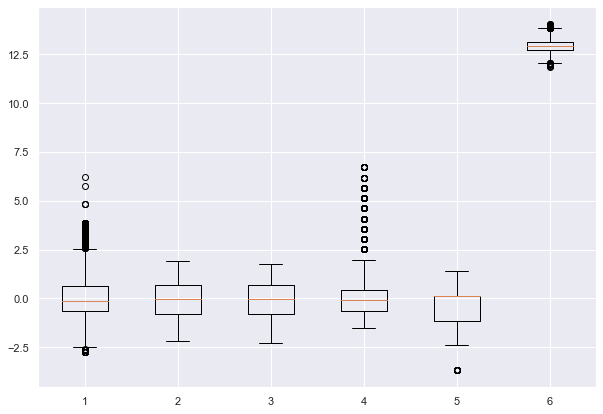

In [34]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

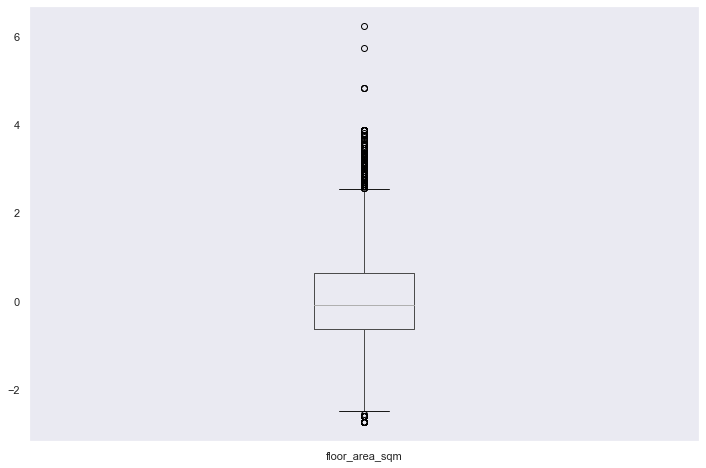

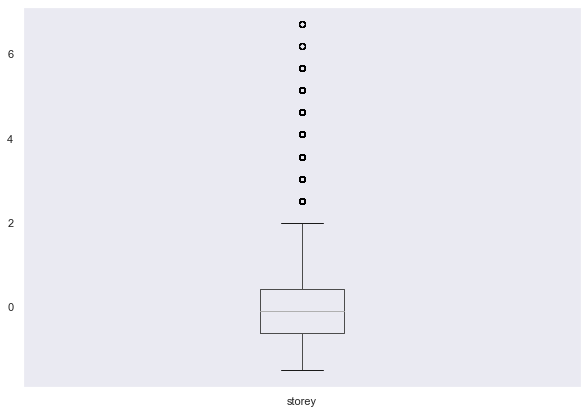

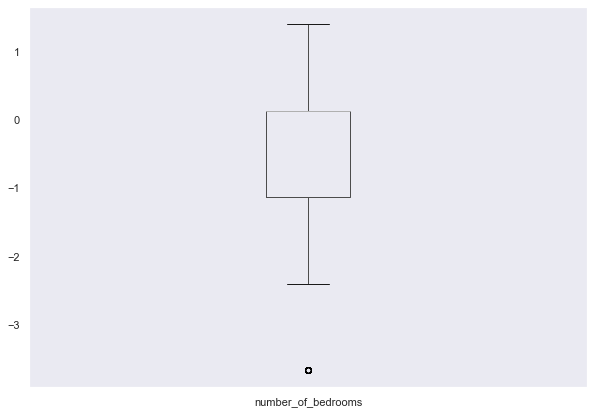

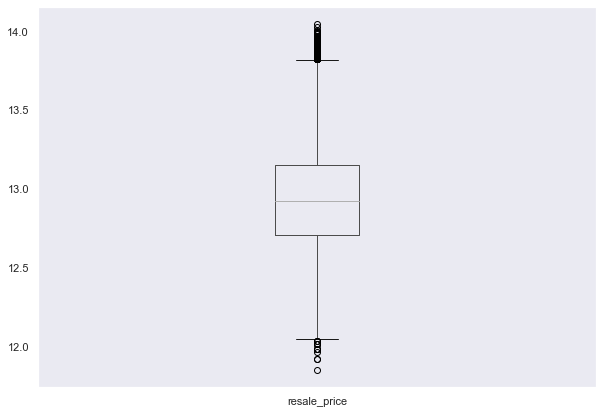

<Figure size 720x504 with 0 Axes>

In [35]:
# A closer look
def plot_boxplot(df,ft):
    data.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
    plt.figure(figsize =(10, 7))
plot_boxplot(data, 'floor_area_sqm')
plot_boxplot(data, 'storey')
plot_boxplot(data, 'number_of_bedrooms')
plot_boxplot(data, 'resale_price')

We can see that they are some outliers in these variables. 

## Remove outliers

## Two-step approach 

In [36]:
# define a function called outliers that return a list of index of outliers 
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1  # interquatile range formula 

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]

    return ls

In [86]:
# create list to store output indices
index_list = []
for feature in ['floor_area_sqm','storey','number_of_bedrooms','resale_price']:
    index_list.extend(outliers(data, feature))

Before we cleaned, let's check the shape of the dataframe. 

In [40]:
data.shape

(80374, 6)

In [41]:
# define a function called remove that return a cleaned dataframe without outliers 
def remove(df,ls): 
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

df_cleaned = remove(data, index_list)

In [42]:
# check to see if we have removed the rows that contain outliers 
df_cleaned.shape

(77207, 6)

Now, the Dataset is Ready for any Machine Learing Model & Analysis. 

# 6.0 Model Building

# 6.1 Multi Linear Regression

## Define x and y

In [43]:
x = df_cleaned.drop(['resale_price'], axis=1).values
y = df_cleaned['resale_price'].values
print(x)


[[-2.20777382 -1.17744997 -1.03331084  0.42013611 -2.39779042]
 [-1.26072048 -1.25533652 -1.11135156 -1.1519156  -1.13216876]
 [-1.26072048 -1.09956342 -0.95527012 -1.1519156  -1.13216876]
 ...
 [ 1.00397228 -0.55435757 -0.64310723 -0.62789836  1.39907456]
 [ 1.99220184 -0.55435757 -0.64310723 -0.62789836 -1.13216876]
 [ 1.99220184 -0.47647102 -0.64310723 -0.62789836 -1.13216876]]


## Split data into training set and testing set

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state = 0)

## Train model on the training set

In [75]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train,y_train)


print(f'Coefficients: {mlr.coef_}')
print(f'Intercept: {mlr.intercept_}')
print(f'R^2 score: {mlr.score(x_train, y_train)}')


Coefficients: [ 0.21273141 -0.01311186  0.06947428  0.07519958  0.00665967]
Intercept: 12.932742221563705
R^2 score: 0.5949394000725388


## Predict test set results 

In [46]:
y_pred = mlr.predict(x_test)


## Compute accuracy of the model

In [58]:
from sklearn.metrics import r2_score
from sklearn import metrics

r_square=metrics.r2_score(y_test, y_pred)
MAE_linear=metrics.mean_absolute_error(y_test , y_pred)
MSE_linear=metrics.mean_squared_error(y_test , y_pred)
RMSE_linear=np.sqrt(MSE_linear)
pd.DataFrame([r_square, MAE_linear,MSE_linear,RMSE_linear], index=['r_square', 'MAE_linear','MSE_linear','RMSE_linear'],columns=['Value'])

,Value
r_square,0.596751
MAE_linear,0.154954
MSE_linear,0.039627
RMSE_linear,0.199065


In [48]:
import statsmodels.api as sm

#generate OLS model
OLS = sm.OLS(y_train, sm.add_constant(x_train))
OLS_fit = OLS.fit()
OLS_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                 1.587e+04
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:36:19   Log-Likelihood:                 10304.
No. Observations:               54044   AIC:                        -2.060e+04
Df Residuals:                   54038   BIC:                        -2.054e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9327      0.001   1.49e+04      0.000      12.931      12.934
x1             0.2127      0.001    200.626      0.000       0.211       0.215
x2            -0.0131      0.010     -1.363      0.173      -0.032       0.006
x3             0.0695      0.010      7.210      0.000       0.051       0.088
x4             0.0752      0.001     67.152      0.000       0.073       0.077
x5             0.0067      0.001      6.207      0.000       0.005       0.009
==============================================================================
Omnibus:                     5128.245   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6744.734
Skew:                           0.820   Prob(JB):                         0.00
Kurtosis:                       3.555   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot test results

Text(0.5, 1.0, 'Actual vs Predicted')

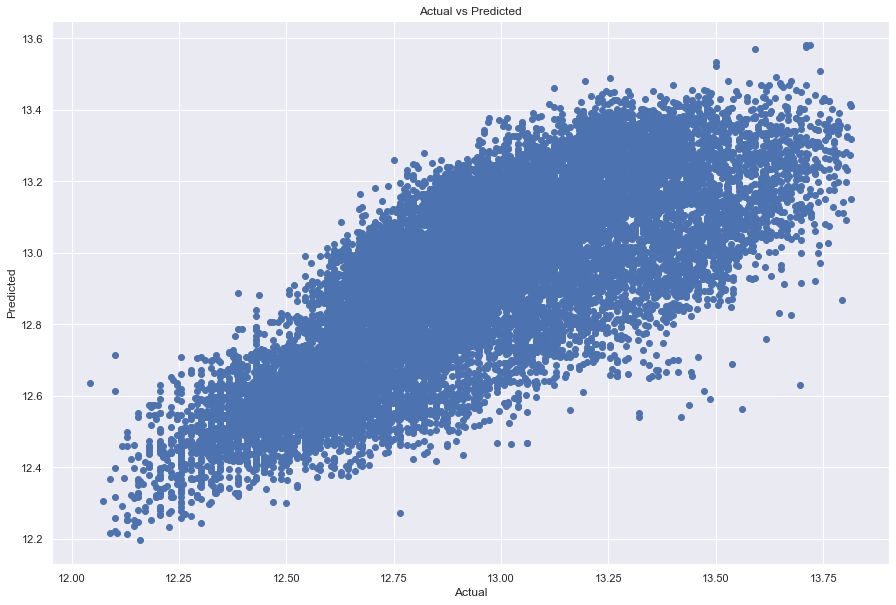

In [49]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')


We can see that the actual and the predicted values are pretty close enough, despite few exception. The selected features are able to account for 59.6% of the variance in HDB resale prices.

## Predicted values

In [50]:
mlr_pred_y_df= pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference': y_test-y_pred})
mlr_pred_y_df[0:11]

,Actual Value,Predicted Value,Difference
0,12.815838,12.731761,0.084077
1,13.171154,13.045629,0.125524
2,13.361380,13.327903,0.033477
3,12.736701,12.929028,-0.192327
4,12.429216,12.502169,-0.072953
5,12.886641,13.160913,-0.274272
6,13.098071,12.766674,0.331397
7,13.345507,12.924553,0.420954
8,13.551545,12.962334,0.589212
9,12.323856,12.544573,-0.220718


# 6.2 Ridge Regression

## Train model on the training set

In [59]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
# create ridge regression with candidate alpha values
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
# fit the model
model_cv = regr_cv.fit(x_train, y_train)
# View alpha
model_cv.alpha_

10.0

In [60]:
# we will use alpha 10 to build our model
ridge_model= Ridge(alpha=10)
ridge_model.fit(x_train, y_train)

print(f'Coefficients: {ridge_model.coef_}')
print(f'Intercept: {ridge_model.intercept_}')
print(f'R^2 score: {ridge_model.score(x_train, y_train)}')

Coefficients: [ 0.21267958 -0.01130932  0.06766966  0.07517632  0.00669366]
Intercept: 12.93273964819713
R^2 score: 0.5949391094566479


## Predict test set results 

In [61]:
ridge_pred= ridge_model.predict(x_test)


## Compute accuracy of the model

In [62]:
r_square=metrics.r2_score(y_test, ridge_pred)
MAE_ridge=metrics.mean_absolute_error(y_test , ridge_pred)
MSE_ridge=metrics.mean_squared_error(y_test , ridge_pred)
RMSE_ridge=np.sqrt(MSE_ridge)
pd.DataFrame([r_square, MAE_ridge,MSE_ridge,RMSE_ridge], index=['r_square','MAE_ridge','MSE_ridge','RMSE_ridge'],columns=['Value'])

,Value
r_square,0.596741
MAE_ridge,0.154957
MSE_ridge,0.039628
RMSE_ridge,0.199067


## Predicted values

In [63]:
ridge_pred_y_df=pd.DataFrame({'Y_Test': y_test,'Ridge_Pred':ridge_pred, 'Difference': y_test - ridge_pred})
ridge_pred_y_df[0:11]

,Y_Test,Ridge_Pred,Difference
0,12.815838,12.731687,0.084151
1,13.171154,13.045770,0.125384
2,13.361380,13.327644,0.033736
3,12.736701,12.928914,-0.192213
4,12.429216,12.502385,-0.073168
5,12.886641,13.160783,-0.274142
6,13.098071,12.766588,0.331483
7,13.345507,12.924435,0.421072
8,13.551545,12.962496,0.589049
9,12.323856,12.544349,-0.220493


# 6.3 Random Forest

## Train model on the training set 

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

print(f'R^2 score: {forest_reg.score(x_train, y_train)}')


R^2 score: 0.8422692141694321


## Predict test set results 

In [65]:
forest_pred = forest_reg.predict(x_test)

## Compute accuracy of the models

In [66]:
r_square =metrics.r2_score(y_test, forest_pred)
MAE_forest=metrics.mean_absolute_error(y_test , forest_pred)
MSE_forest=metrics.mean_squared_error(y_test , forest_pred)
RMSE_forest=np.sqrt(MSE_forest)
pd.DataFrame([r_square, MAE_forest,MSE_forest,RMSE_forest], index=['r_square', 'MAE_forest','MSE_forest','RMSE_forest'],columns=['Value'])

,Value
r_square,0.726877
MAE_forest,0.118534
MSE_forest,0.026839
RMSE_forest,0.163827


## Predicted values

In [67]:
forest_pred_y_df=pd.DataFrame({'Y_Test': y_test,'Forest_Pred':forest_pred, 'Difference': y_test - forest_pred})
forest_pred_y_df[0:11]

,Y_Test,Forest_Pred,Difference
0,12.815838,12.765256,0.050582
1,13.171154,13.240189,-0.069036
2,13.361380,13.341070,0.020311
3,12.736701,12.805987,-0.069286
4,12.429216,12.425156,0.004060
5,12.886641,12.897373,-0.010732
6,13.098071,13.043260,0.054810
7,13.345507,12.837385,0.508122
8,13.551545,13.483658,0.067887
9,12.323856,12.379308,-0.055452


# 7.0 Conclusion

The aim of this project was to create a model that accurately predicts the resale price of HDB Flat Singapore. In this project, 3 different models, linear regression, ridge regression, and random forest. From the results, we can conclude that random forest model estimated best accuracy as it has the lowest MAE, MSE and RMSE value. Random forest model shows that the selected features are able to account for 72.7% of the variance in HDB flat resale prices.

